In [11]:
import os
import cv2
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [13]:
x_train=keras.utils.normalize(x_train,axis=1)
x_test=keras.utils.normalize(x_test,axis=1)

In [14]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2605 - accuracy: 0.9241
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1073 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0724 - accuracy: 0.9772


In [17]:
#model.save_weights('handwritten.h5')

In [18]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0935 - accuracy: 0.9721


In [19]:
print(loss)
print(accuracy)

0.09345170110464096
0.972100019454956


1/1 [==============================] - 0s 77ms/step
This digit is probably a 7


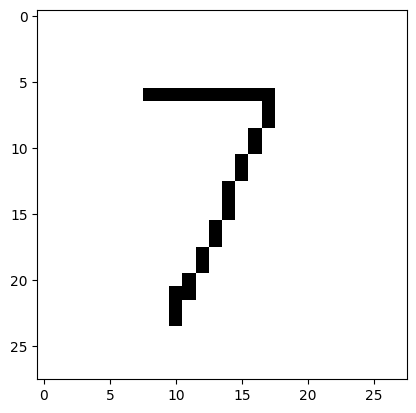

1/1 [==============================] - 0s 31ms/step
This digit is probably a 5


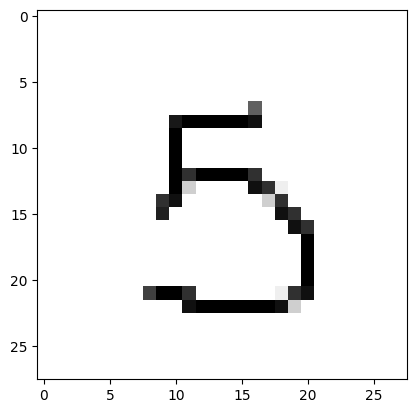

1/1 [==============================] - 0s 16ms/step
This digit is probably a 3


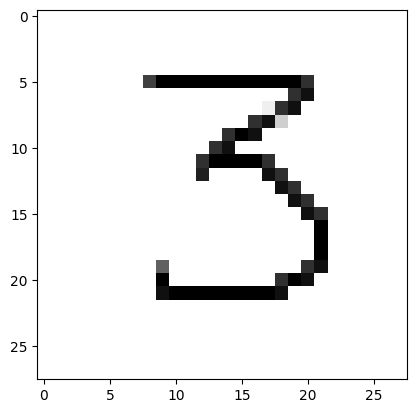

In [20]:
image_number=1
while os.path.isfile(f"digits/{image_number}.png"):
    try:
        img=cv2.imread(f"digits/{image_number}.png")[:,:,0]
        img=np.invert(np.array([img]))
        predection=model.predict(img)
        print(f"This digit is probably a {np.argmax(predection)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_number +=1
        
        